In [1]:
#import the libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

from sklearn.tree import export_graphviz
import pandas as pd
from graphviz import Source
from sklearn import tree
from IPython.display import display

In [2]:
# Load dataset into datafram
df = pd.read_csv('iris dataset.csv')

In [3]:
# Displaying the first five rows of the DataFrame 
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Check the descriptive statistics of numeric variables
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Visualization

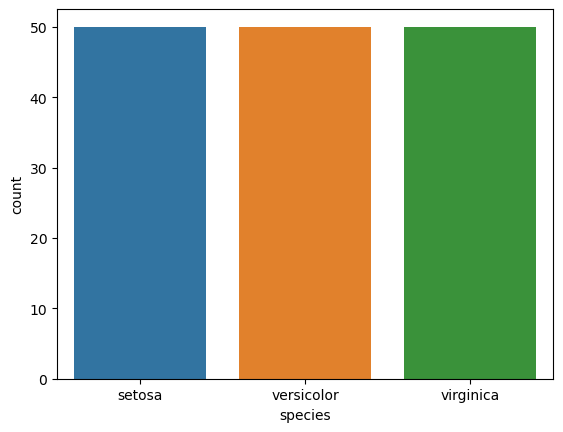

In [5]:
#counterplot helps in the distribution of categorical variables 
sns.countplot(x='species', data=df, )
plt.show()

- we can see that all the species have equally balance. 

We will see the relationship between the sepal length and sepal width and also between petal length and petal width.

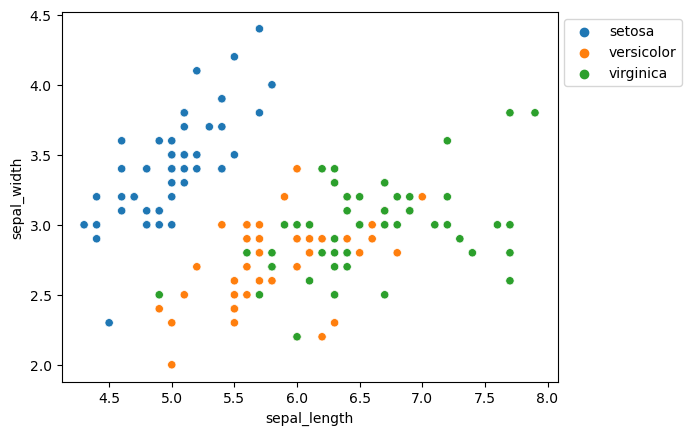

In [6]:
sns.scatterplot(x='sepal_length', y='sepal_width',
                hue='species', data=df, )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

- Species Setosa has smaller sepal lengths but larger sepal widths.
- Versicolor Species lies in the middle of the other two species in terms of sepal length and width
- Species Virginica has larger sepal lengths but smaller sepal widths.

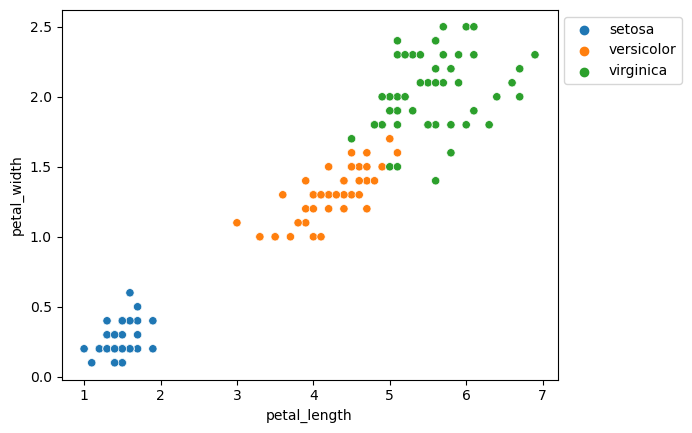

In [7]:
sns.scatterplot(x='petal_length', y='petal_width',
                hue='species', data=df, )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

- Species Setosa has smaller petal lengths and widths.
- Versicolor Species lies in the middle of the other two species in terms of petal length and width
- Species Virginica has the largest of petal lengths and widths.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


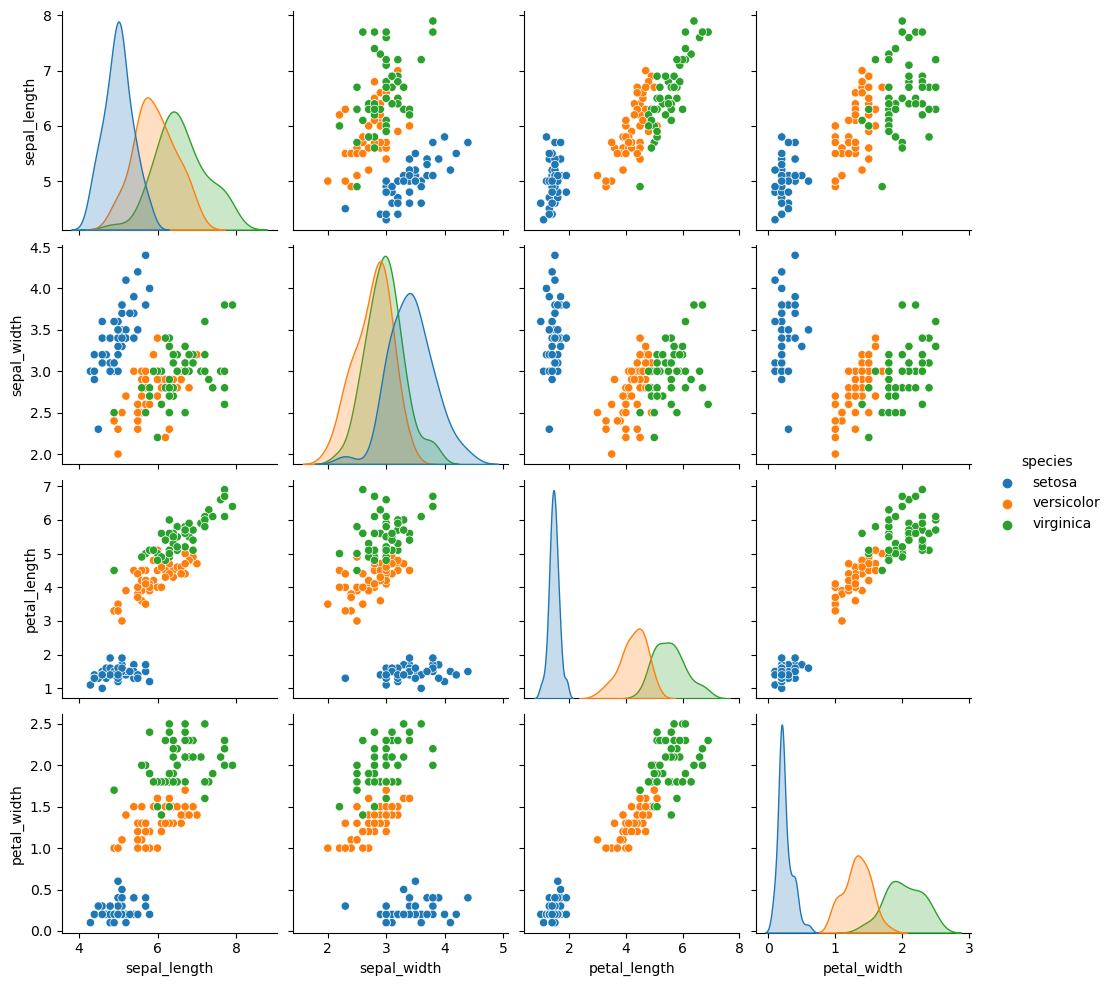

In [8]:
# Visualize the whole dataset
sns.pairplot(data=df,hue='species')

- The species Setosa has the smallest of petals widths and lengths

# Model Building 

In [9]:
# Features
x=df.drop('species',axis=1)
# Target
y=df["species"]

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

Build and train Decision Tree Classifier

In [11]:
# build the claasssifer
model= tree.DecisionTreeClassifier(criterion='gini')

In [12]:
# Train the classsifer
model.fit(x_train,y_train)

DecisionTreeClassifier()

Step 4: Predicting

In [13]:
model.predict(x_test)

array(['versicolor', 'virginica', 'virginica', 'virginica', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'setosa', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'virginica',
       'setosa', 'virginica', 'setosa', 'virginica'], dtype=object)

Step 5 : Accuaracy score

In [14]:
accuracy_score(y_test,model.predict(x_test))

0.9

Testing the model:

In [15]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction = model.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['setosa' 'versicolor' 'virginica']


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Visualizing the tree 

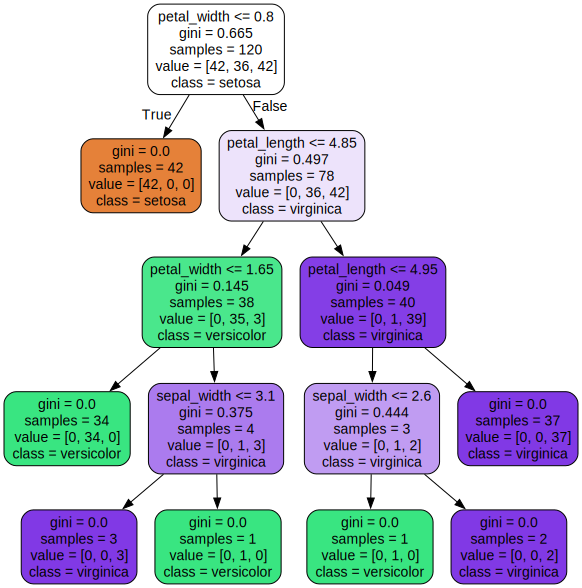

In [16]:
class_names = [str(class_name) for class_name in pd.unique(df['species'])]
dot_data = Source(export_graphviz(model, out_file=None,
                                feature_names=x.columns,
                                class_names=class_names,
                                label='all',
                                rounded=True,
                                filled=True))
display(dot_data)